# <Font Color="Red">Part-1 Introduction and EDA </font>

# Business problem


The AllState Insurance company wants to reduce the time taking process and make it easier for the people who need insurance cover to claim it much easier .So in order to reduce the complexity , It has given a dataset to use machine learning algorithms to predict the costs and hence the severity of the claims accurately . This would help the people claiming the insurance to better cope with the severity rather than dealing with the complex process of submitting the papers and dealing with the insurance agents .
 
With the help of these trained ML models , the company can predict how much loss has happened to the victims and allocate funds to them much faster as there are millions of customers, predicting the costs become essential either for making funds available within the company to give to the victims or to even cross check the maximum and minimum loss that would be probably happened to the victim as the would also act as ML model as a base reference (for fraud detection also ).


# ML formulation 

The insurance claims can depend upon several factors , and with help of those factors ( features ) we can build a machine learning model to predict the loss amount / the severity of the claims .This would be a unidimensional  regression problem as we have to only predict the costs for each given set of features.


# Why do we need ML solution ?

In the analysis of data we see that there are more than 130 features to the data , which influence our target variable. And also there are millions of customers to the company , in such case any other methods of predictions would be very unreliable and inefficient. 

# What is the performance metric and why ?

The performance metric here is MAE (mean absolute error ) 

## **(1 / n) * (∑ |y - ŷ|)**

Mean absolute error is often chosen in the case of predicting the price values , i.e in mostly in regression problems for it's simplicity in understanding . In this case study it is used because of not many outliers in the data . (Because MAE , isn't very compatible with outliers ) . It is very easily interpretable because it's similar to like a average of data whereas a compared to other metrics like RMSE , R^2 ,etc . They cannot be intrepreted although they have better error monitoring and helps in training the model better .

https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d#:~:text=RMSE%20has%20the%20benefit%20of,then%20MAE%20is%20more%20appropriate.

# Importing Libraries 

In [5]:
import numpy as np 
import pandas as pd 
d
import warnings
from scipy.stats import chi2_contingency

from tqdm.autonotebook import tqdm

warnings.filterwarnings('ignore')

**Importing data**

In [2]:
train_data_raw=pd.read_csv('/Users/rupesh/Downloads/Self_casestudy/train.csv')
test_data_raw=pd.read_csv('/Users/rupesh/Downloads/Self_casestudy/test.csv')

In [3]:
train_data_raw.head()

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6     cont7  \
0   1    A    B    A    B    A    A    A    A    B  ...  0.718367  0.335060   
1   2    A    B    A    A    A    A    A    A    B  ...  0.438917  0.436585   
2   5    A    B    A    A    B    A    A    A    B  ...  0.289648  0.315545   
3  10    B    B    A    B    A    A    A    A    B  ...  0.440945  0.391128   
4  11    A    B    A    B    A    A    A    A    B  ...  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  

[5 rows x 132 columns]

In [4]:
print("Train data dimensions: ", train_data_raw.shape)
print("Test data dimensions: ", test_data_raw.shape)

Train data dimensions:  (188318, 132)
Test data dimensions:  (125546, 131)


Hence we see that there is nearly the same number of train and test data points.

In [6]:
print("Total missing values in the data",train_data_raw.isnull().sum().sum())

Total missing values in the data 0


Because of no missing values in the data we can skip the missing values imputing and other preprocessing steps initially .

In [7]:
continous_vars=train_data_raw.columns[117:].tolist()
# getting all the feature names in the dataframe which have continous variables 

# Analysis of Continous variables 

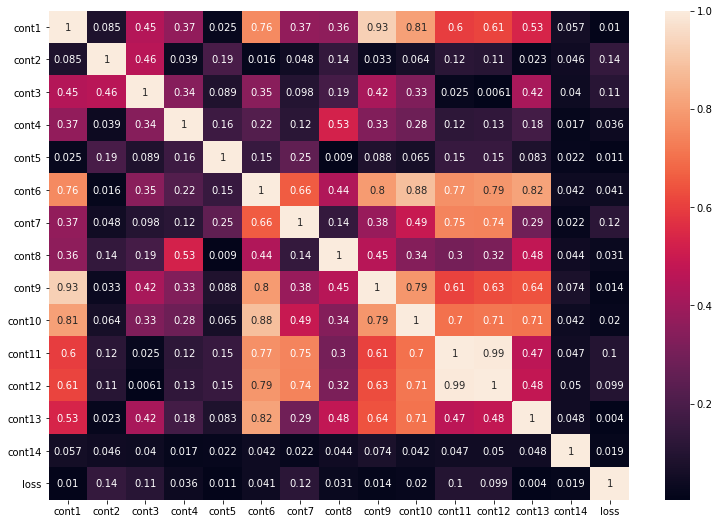

In [8]:
#Plotting the correlation matrix in a heatmap
correlationMatrix = train_data_raw[continous_vars].corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(correlationMatrix,annot=True)

sns.heatmap(correlationMatrix, cbar=False)
plt.show()

In the above correlation heat map we observe that there are certain continous varibles which have very high correlations like ( cont11,cont12 ) variables with 0.99 . We know that in linear algorithms like Linear regresion , etc highly correlated variables cause i.e even for small changes in data , there can be large changes in the model . And there is also a chance of overfitting the regression models too .

https://en.wikipedia.org/wiki/Multicollinearity#Consequences_of_multicollinearity

In [9]:
# df_continous.corr()

In [10]:
# Calculates pearson co-efficient for all combinations
correlation_vals = train_data[train_data.columns[117:-1]].corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.5

corr_list = []

#Search for the highly correlated pairs
for i in range(0,14): #for 'size' features
    for j in range(i+1,14): #avoid repetition
        if (correlation_vals.iloc[i,j] >= threshold and correlation_vals.iloc[i,j] < 1) or (correlation_vals.iloc[i,j] < 0 and correlation_vals.iloc[i,j] <= -threshold):
            corr_list.append([correlation_vals.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Printing correlations and column names
for v,i,j in s_corr_list:
    print ("{} and {} = {}" .format(continous_vars[i],continous_vars[j],v))

cont11 and cont12 = 0.9943841100215426
cont1 and cont9 = 0.9299117057616605
cont6 and cont10 = 0.8833505068490387
cont6 and cont13 = 0.8150910765208513
cont1 and cont10 = 0.808550869433365
cont6 and cont9 = 0.7975435189946614
cont9 and cont10 = 0.7856967914960287
cont6 and cont12 = 0.7851439724373728
cont6 and cont11 = 0.7737454535518364
cont1 and cont6 = 0.7583153164366699
cont7 and cont11 = 0.7471079167885684
cont7 and cont12 = 0.7427122632500042
cont10 and cont12 = 0.7138119332651464
cont10 and cont13 = 0.7078763931019546
cont10 and cont11 = 0.7028955435078391
cont6 and cont7 = 0.6589182968091565
cont9 and cont13 = 0.6420276948882455
cont9 and cont12 = 0.6266564373272568
cont1 and cont12 = 0.6142254546727596
cont9 and cont11 = 0.6080004698112341
cont1 and cont11 = 0.5960897961424234
cont1 and cont13 = 0.5348495237416382
cont4 and cont8 = 0.5287402972174802


Here , we see that there is a very high correlation between cont11 and cont12 features of 0.99 , which indicates both the features are almost in a linear relation with each other .

And there are also high correlations among the features as observed from the above output , which can cause some undesirable problems while training our models 

In [18]:
train_data.columns.tolist()[117:]

['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14',
 'loss']

In [19]:
df_continous=train_data[train_data.columns.tolist()[117:]]

In [20]:
sorted_lis=sorted(df_continous.corr(),reverse=True)
sorted_cor_vals=sorted(df_continous.corr()['loss'],reverse=True)
print("Highest correlations between target variable (loss) and continous variables are :")
for i in range (1,15):
    print('Correlation b/w loss and {} is {}'.format(sorted_lis[i],sorted_cor_vals[i]))


Highest correlations between target variable (loss) and continous variables are :
Correlation b/w loss and cont9 is 0.14152795887903236
Correlation b/w loss and cont8 is 0.1197988705031154
Correlation b/w loss and cont7 is 0.1110533081772429
Correlation b/w loss and cont6 is 0.09980638463804671
Correlation b/w loss and cont5 is 0.09872384974320879
Correlation b/w loss and cont4 is 0.04096682474990028
Correlation b/w loss and cont3 is 0.030508379587438496
Correlation b/w loss and cont2 is 0.020236142979711776
Correlation b/w loss and cont14 is 0.01929782972866798
Correlation b/w loss and cont13 is 0.014455587837239697
Correlation b/w loss and cont12 is -0.004022110368734267
Correlation b/w loss and cont11 is -0.010236937708398477
Correlation b/w loss and cont10 is -0.011354502446468762
Correlation b/w loss and cont1 is -0.03583080983088063


The above output represents the highest correlations between the continous variables and loss . The highest being for cont9 , although we consider a variable to be strongly correlated if value of correlation is more than 0.5 , the order only represents the highest correlations . 

We can also observe that the continous variables cont11 and cont12 which have very high inter correlations have relatively weak correlation with loss . But cont1 and cont9 variable also have high inter correlation of 0.92 but cont9 has the highest correlation and cont1 has the lowest (in top14) . 

In [21]:
lis1=[]
lis2=[]
for i in range (0, len(s_corr_list)):
    lis1.append(s_corr_list[i][1])
    lis1.append(s_corr_list[i][2])
    

In [22]:
hig_corr_cont=[]
for i in range(0, len(list(set(lis1)))):
    hig_corr_cont.append(continous_vars[list(set(lis1))[i]])

In [23]:
common_eles=list(set(sorted_lis) & set(hig_corr_cont))
set(common_eles) == set(hig_corr_cont)

True

In [24]:
len(common_eles)

10

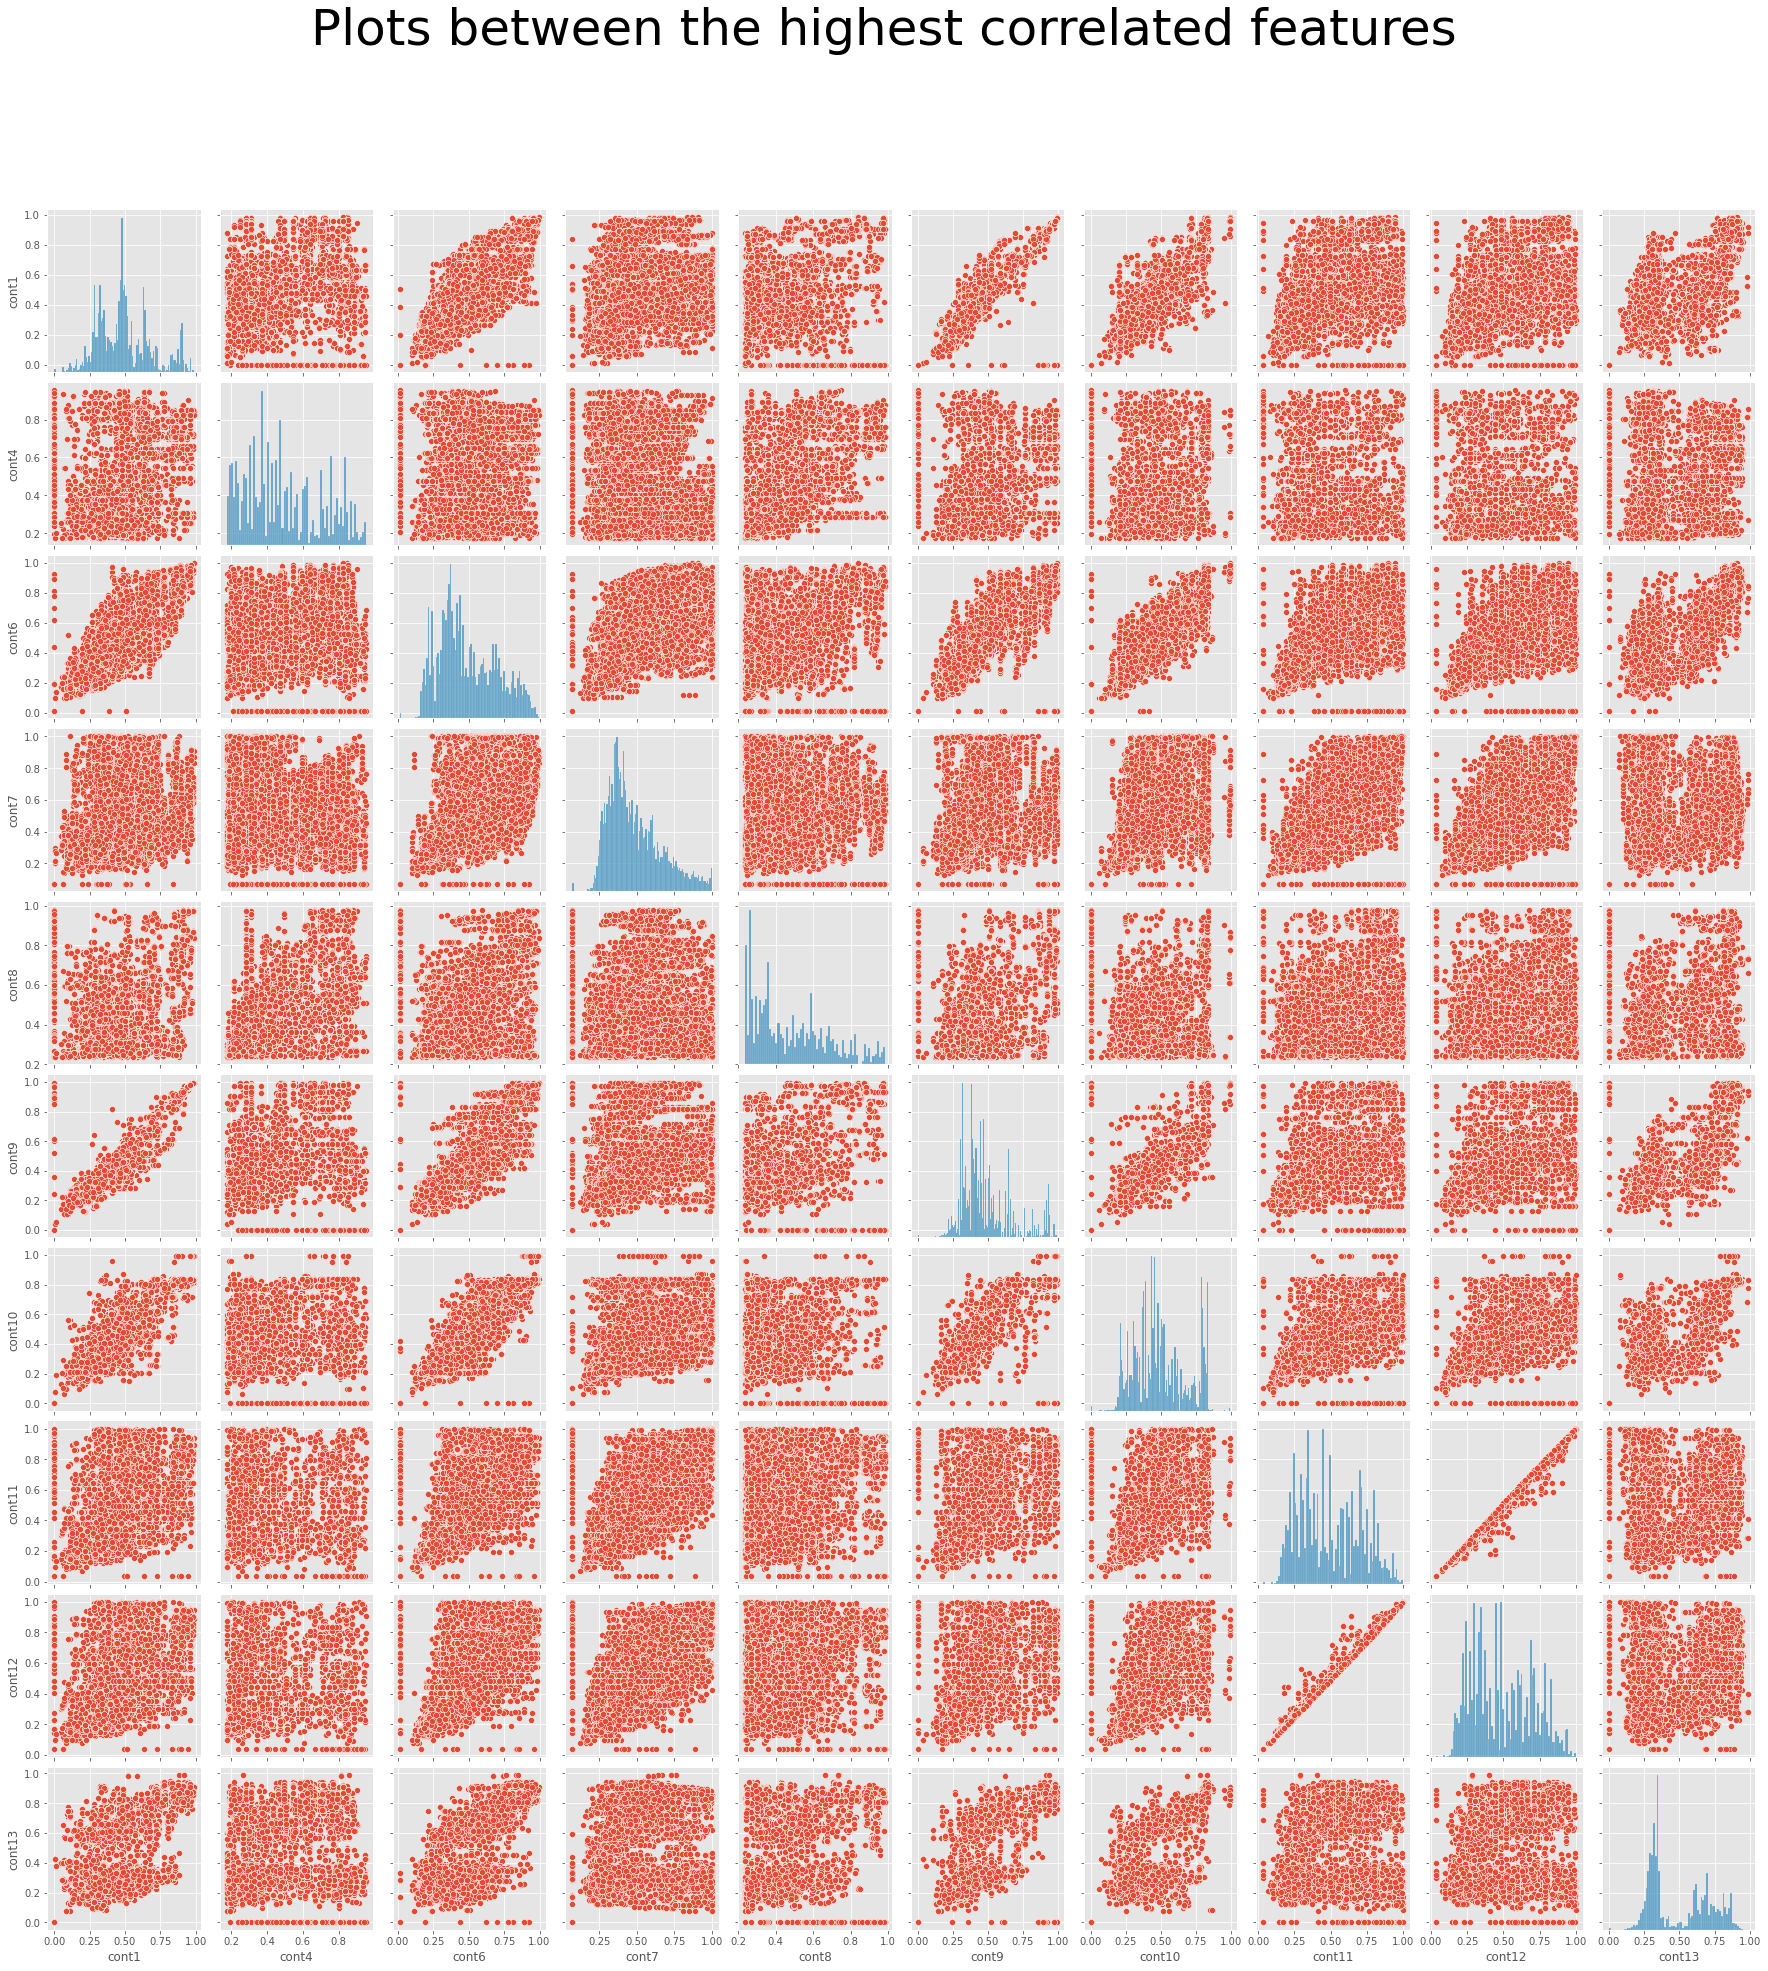

In [277]:
g=sns.pairplot(train_data, vars=hig_corr_cont)
g.fig.suptitle("Plots between the highest correlated features",y=1.1,size=50)
plt.show()

Here in the pair plots we can see that (cont11 ,cont12) & (cont1 and cont9) have almost linear relation because of their high correlations . While the rest of the variables do no show much of a relatively strong linear relationship as the top 2 but some of the variables like (cont6 ,cont10) and are linearly scattered.

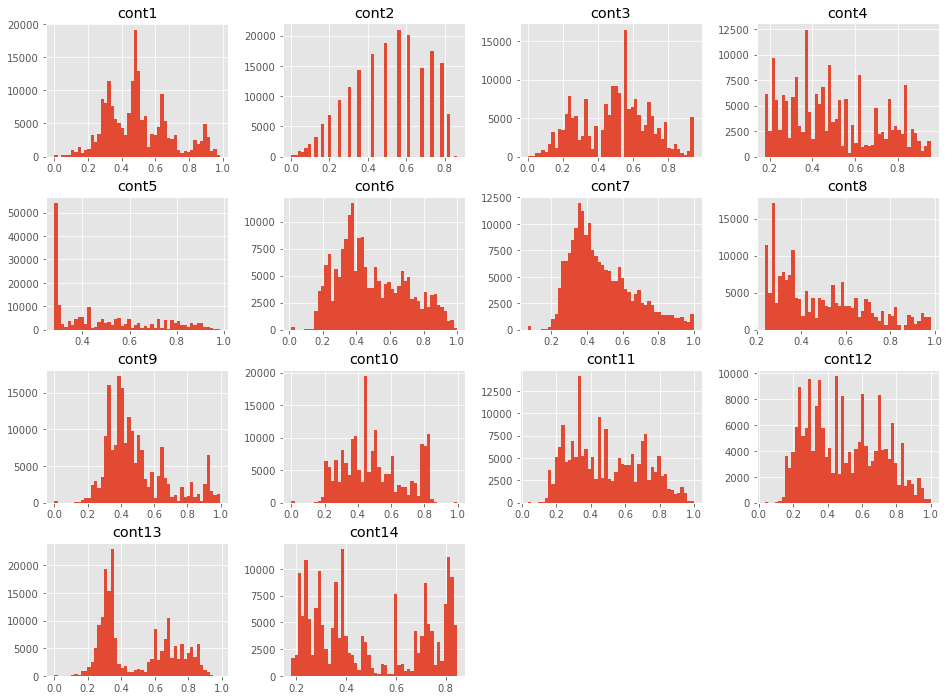

In [296]:
train_data[continous_vars[0:14]].hist(bins=50, figsize=(16,12))
plt.show()

Many of the continous distributions look like they have been converted from categorical into continous variables by looking at the spikes and , almost none of them have gaussian distribution . So converting them into gaussian distribution can help in improving the model's performance.

# Analysis of Categorical variables 

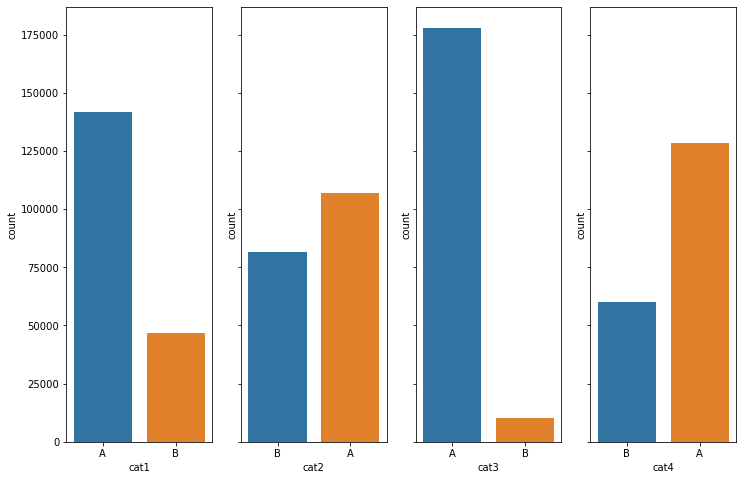

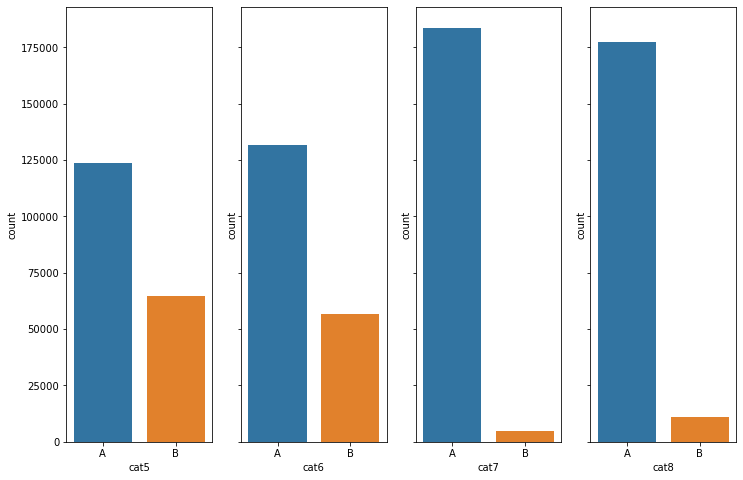

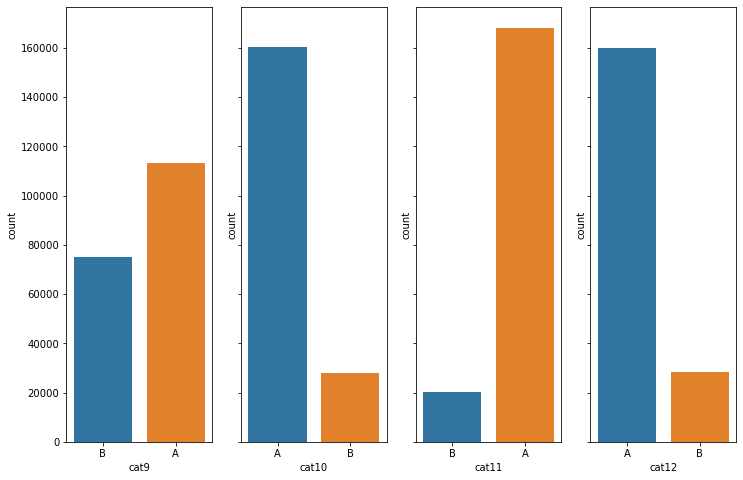

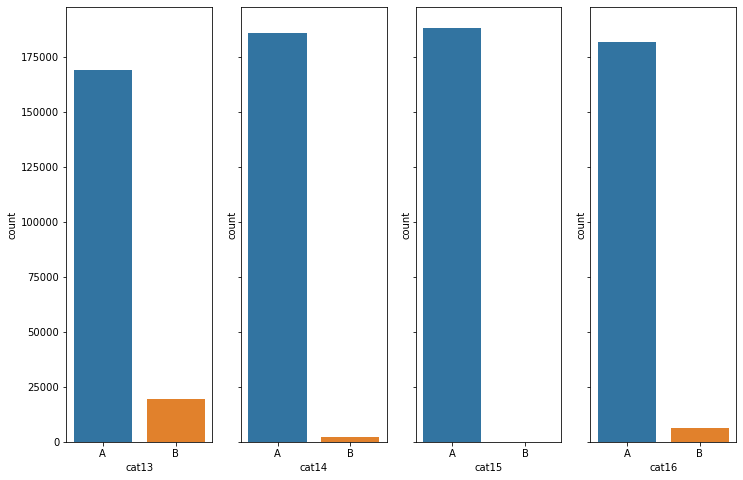

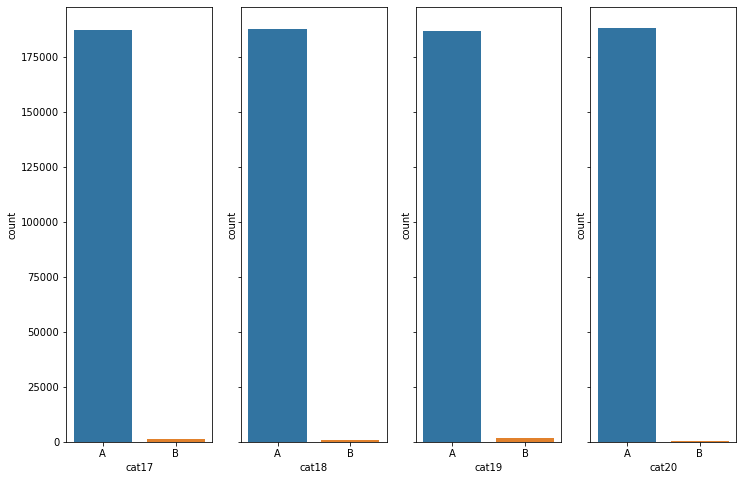

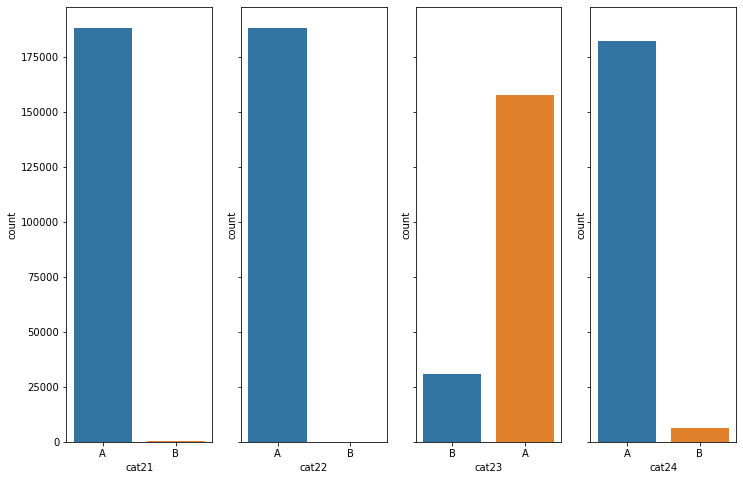

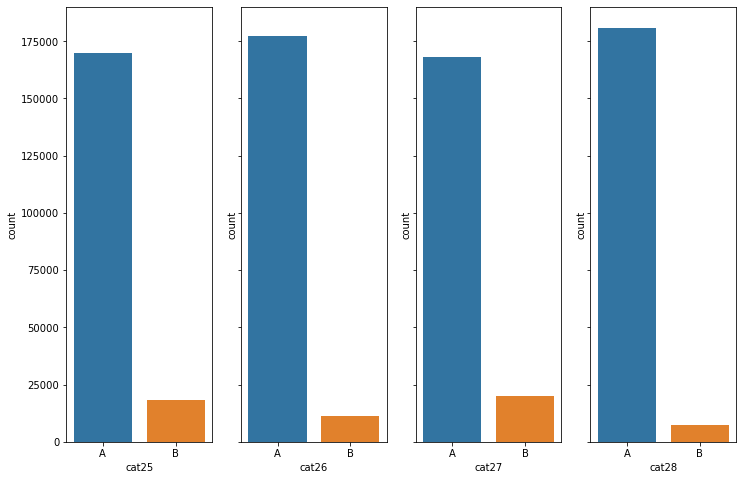

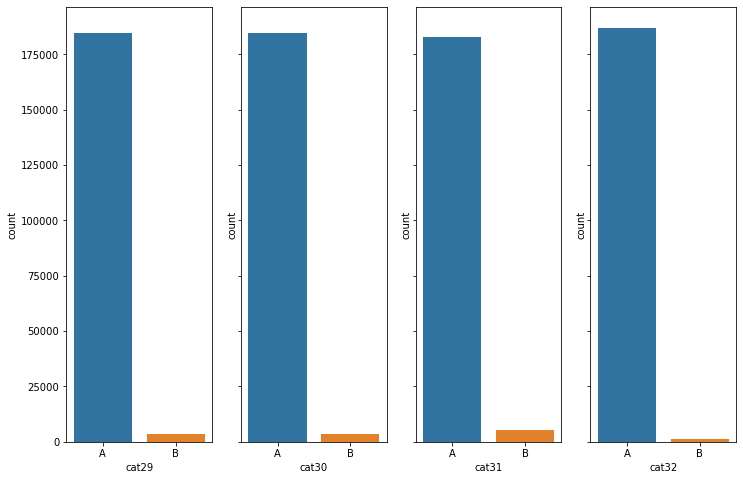

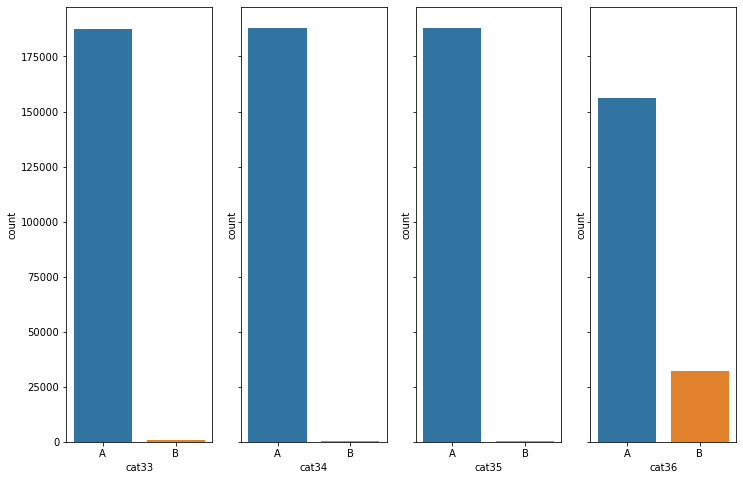

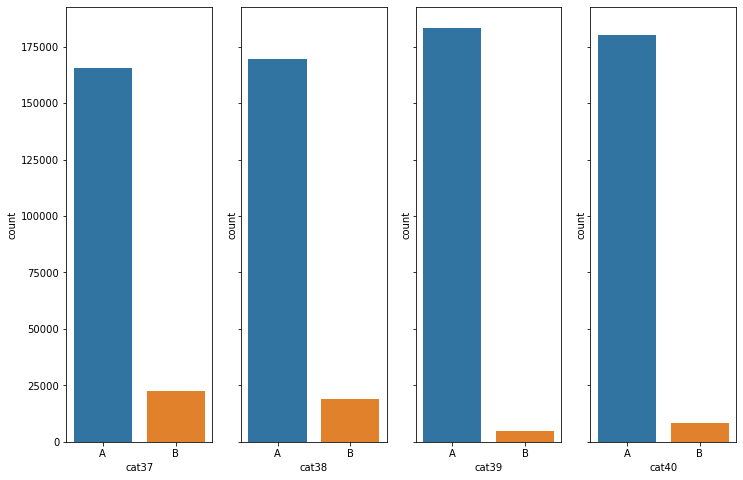

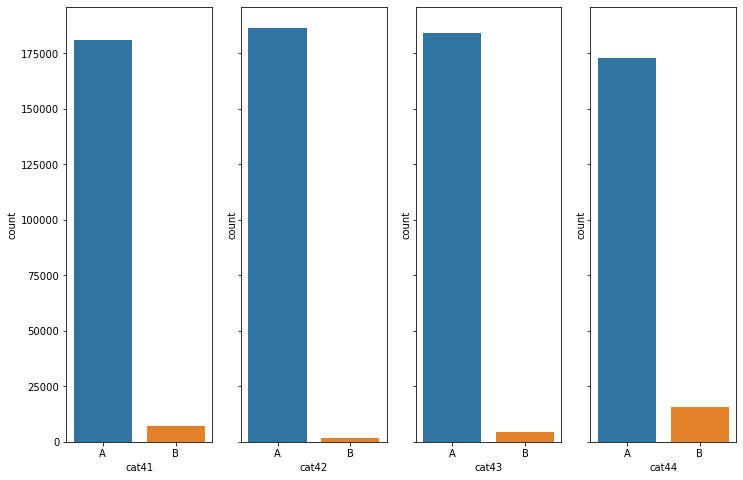

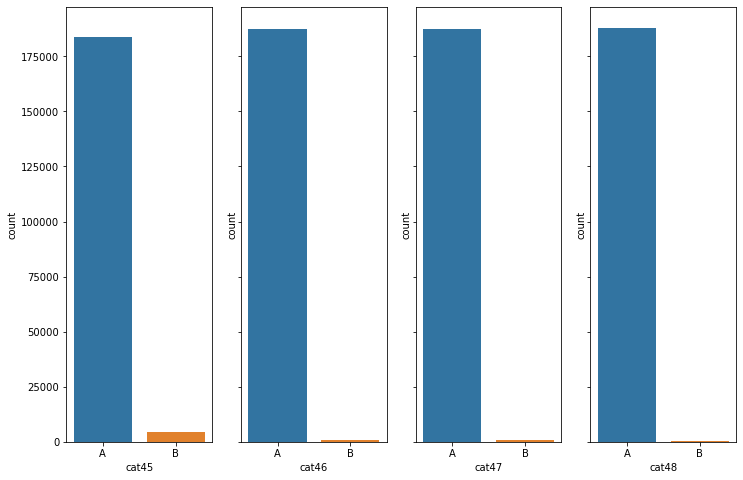

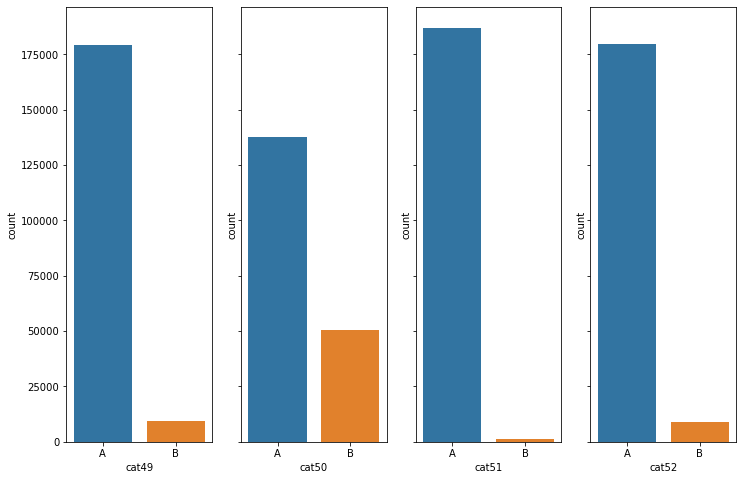

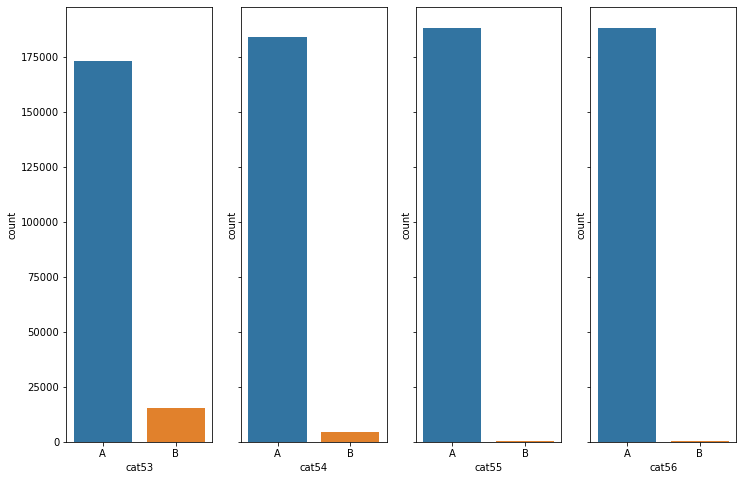

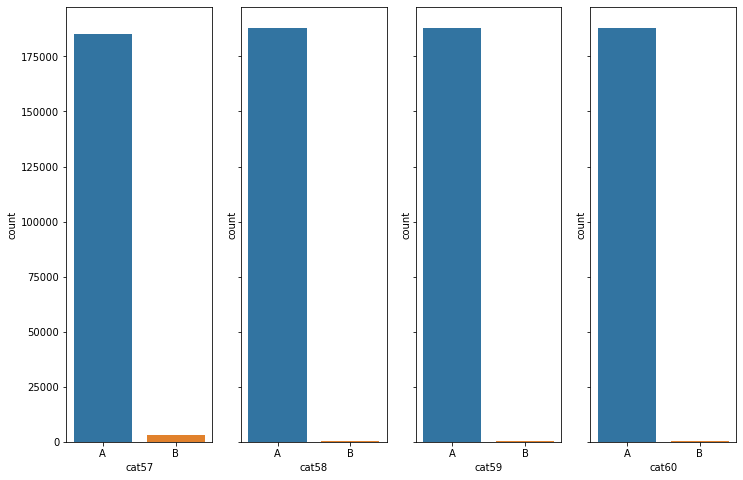

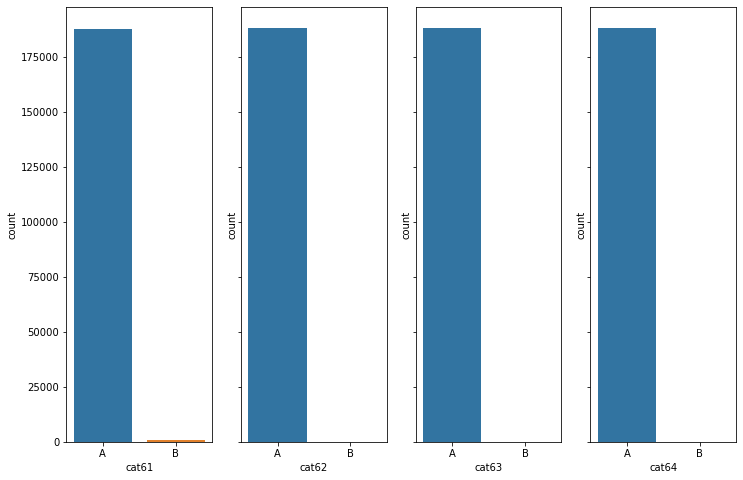

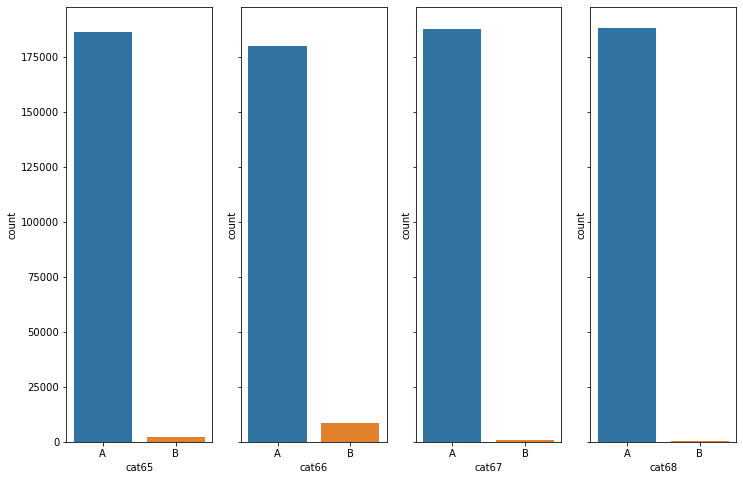

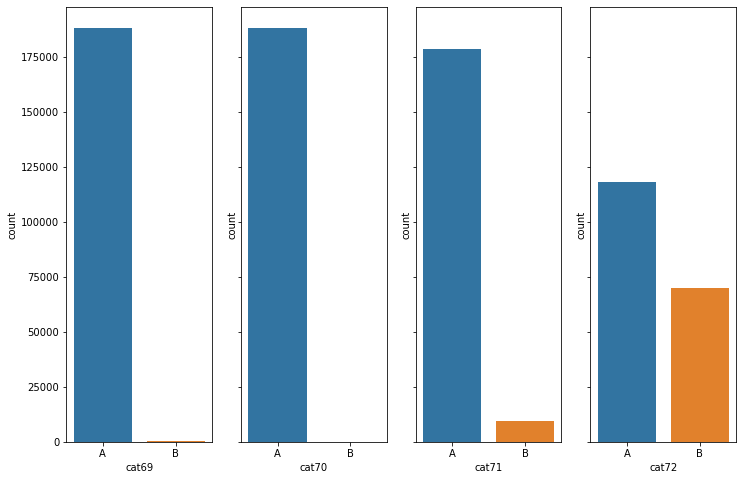

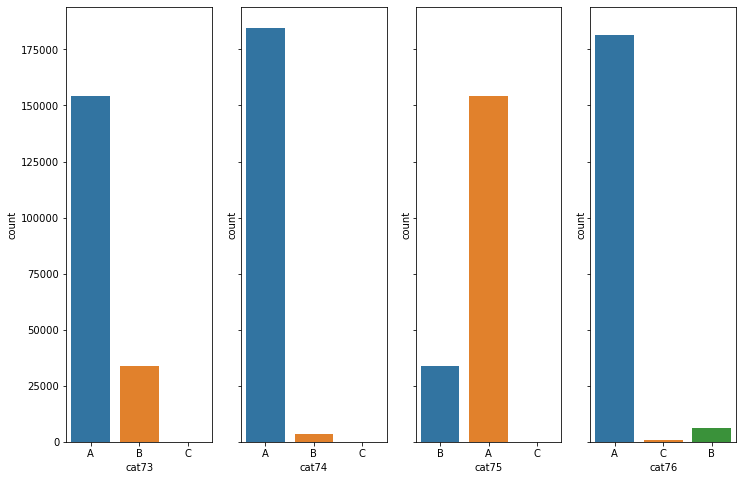

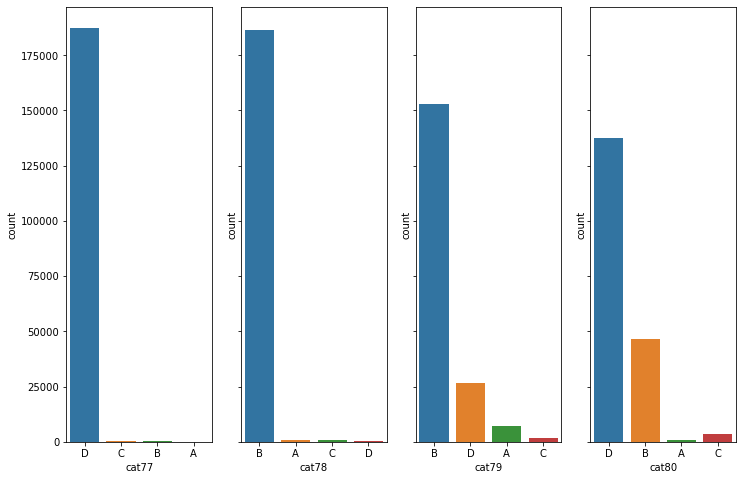

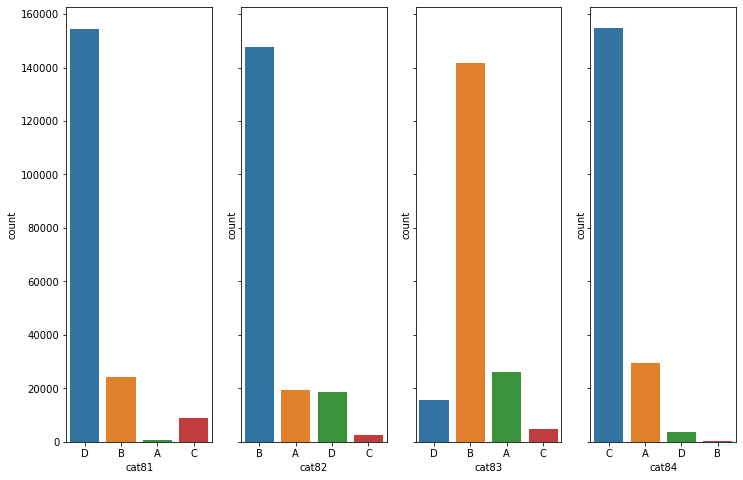

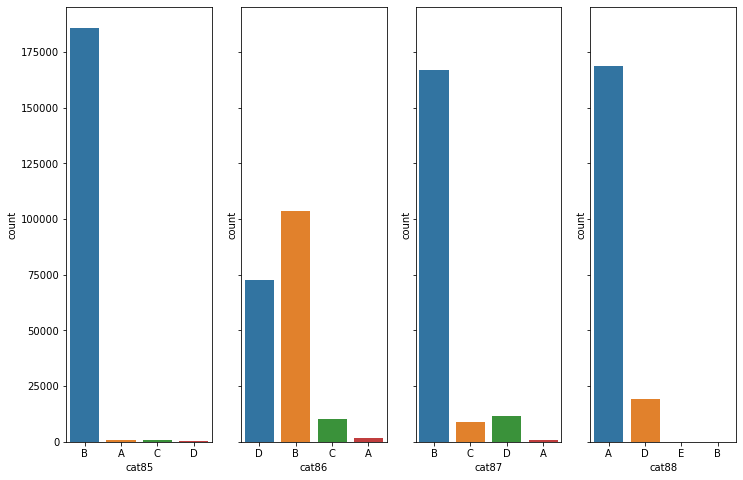

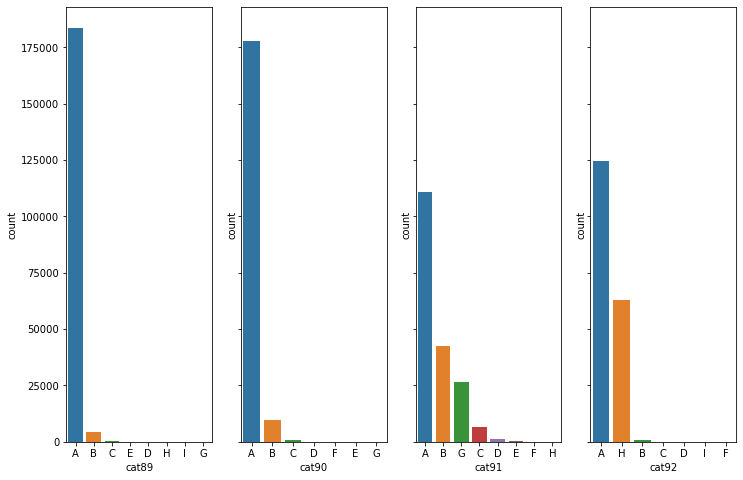

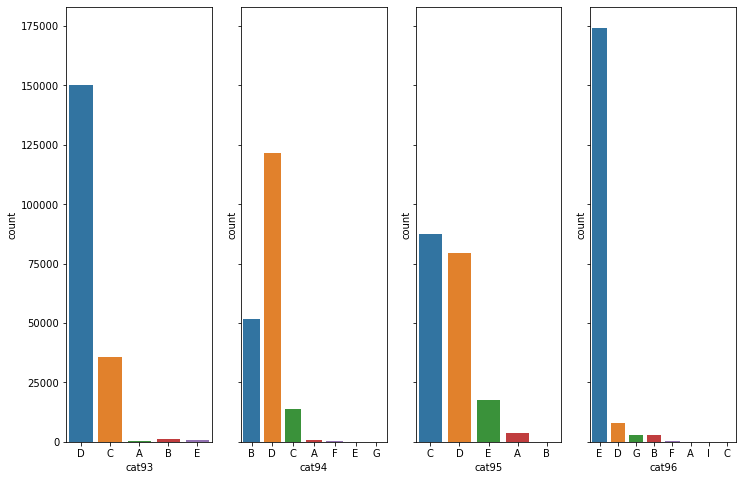

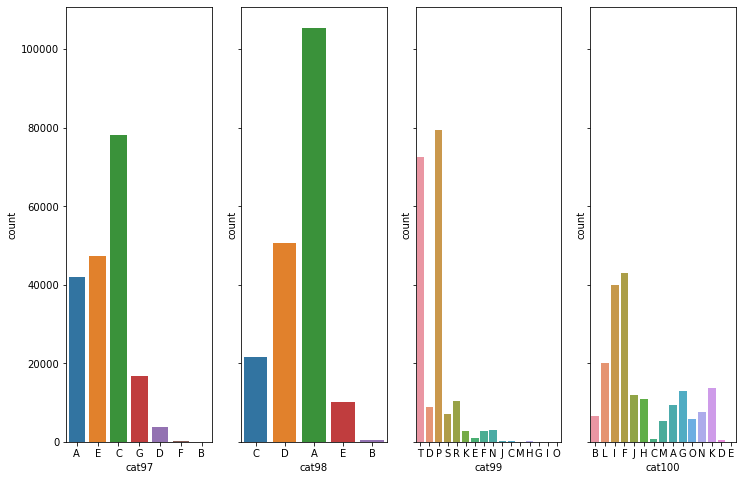

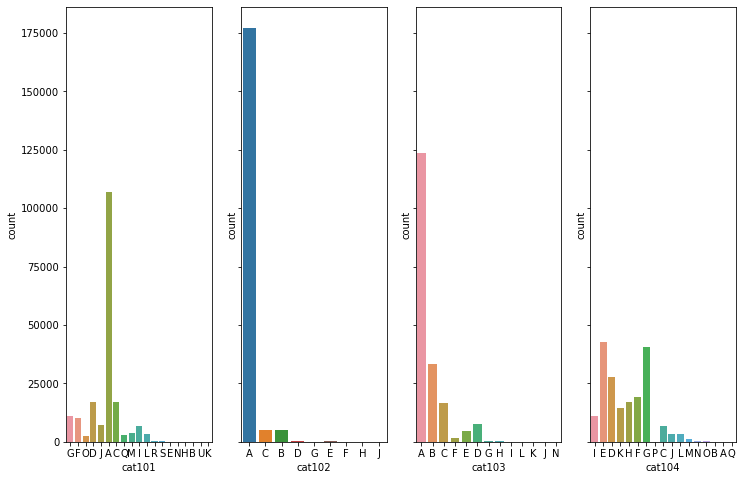

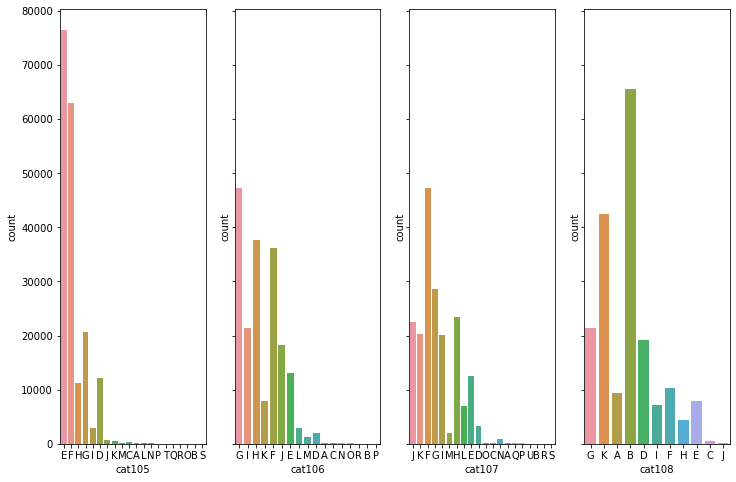

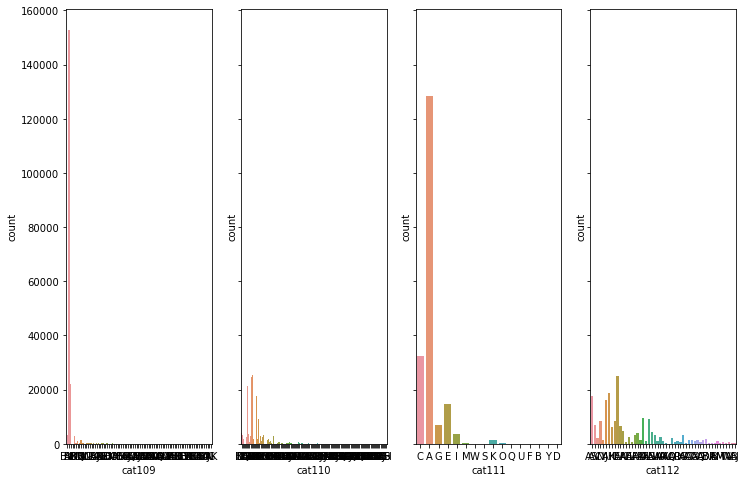

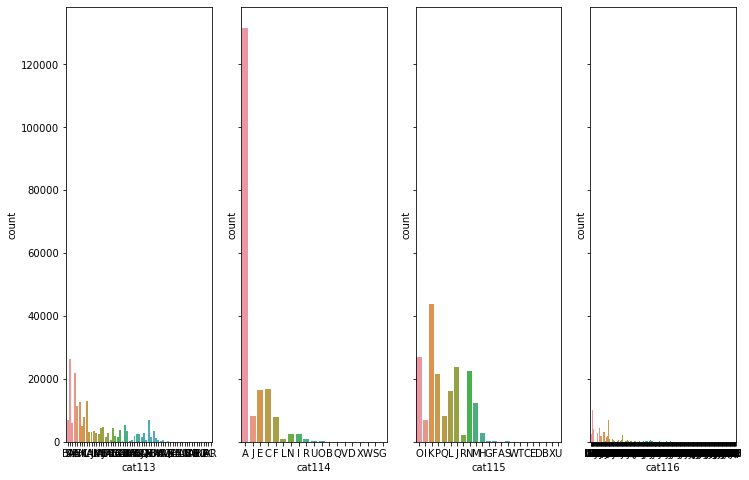

In [25]:
cols = train_data.columns[1:117]

#Plot count plot for all attributes in a 29x4 grid
n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=train_data, ax=ax[j])


The above plots represents analysis of the different label's distribution of all the categorical variables present in the dataframe and some of the analysis are :

1. From the categorical variables of cat1 to cat72 there are only two labels of A,B . Whereas from CAT73 to cat 116 there are multiple (>3) labels .
2. In two labeled categorical variable in almost (except for 5) every categorical variables the majority class is A.
3.In Cat109 , there is a single category which has overwhelmingly high majority over all the other classes .
4.There are a lot of labels for the variables of cat 116 and cat113


In [44]:
unique_vals=[]
for vals in train_data[train_data.columns[1:117].tolist()]:
    unique_vals.append(len(pd.unique(train_data[vals])))

In [76]:
len(train_data.columns[89:117].tolist())

28

In [77]:
len(unique_vals[88:])

28

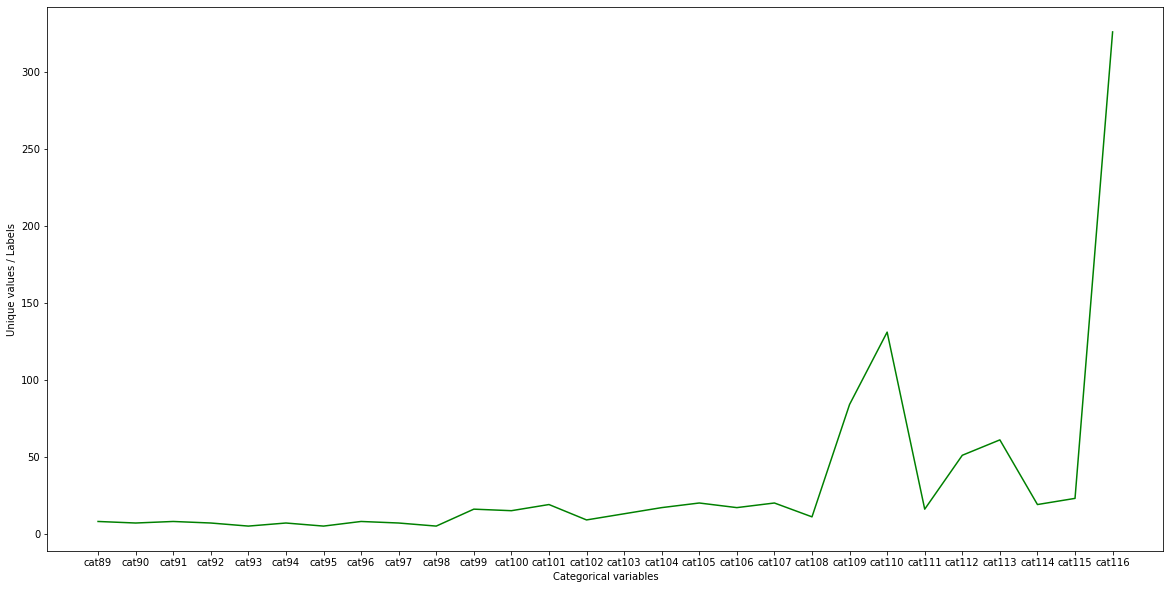

In [78]:
plt.figure(figsize=(20,10))
plt.xlabel("Categorical variables")
plt.ylabel("Unique values / Labels")
plt.plot((train_data.columns[89:117].tolist()),unique_vals[88:],'g') 
plt.show()

The above graph reprents the number of labels are present in the each corresponding categorical variables and we find that the variables of cat116 has the highest number of labels of 326 , cat110 has the next highest number of labels of 131 . These variables pose a problem , as they create huge dimensionality for classifications , and assigning them into continous variables would and implementing a regresion for them will be more appropriate 

**Converting categorical variables into continous variables to perform correlation analysis**

In [31]:
from sklearn.preprocessing import LabelEncoder

for col in train_data_raw.select_dtypes(include=['object']).columns:
    enc = LabelEncoder()
    train_data_raw[col] = enc.fit_transform(train_data_raw[col])


In [32]:
for col in test_data_raw.select_dtypes(include=['object']).columns:
    enc = LabelEncoder()
    test_data_raw[col] = enc.fit_transform(test_data_raw[col])

In [41]:
cat_vars=train_data_raw.columns[1:117].tolist()

In [42]:
cat_vars.append('loss')

In [44]:
df_cat=train_data_raw[cat_vars]

In [105]:
k=pd.crosstab(df_cat["cat1"], df_cat["cat2"])

In [107]:
data = [df_cat["cat1"].tolist(), df_cat["cat2"].tolist()]
stat, p, dof, expected = chi2_contingency(k)

    # interpret p-value
        alpha = 0.05
        print("p value is " + str(p))
        if p <= alpha:
            print('Dependent (reject H0)')
        else:
            print('Independent (H0 holds true)')

In [45]:
chi_sqr_vals=[]
cat_vars=[]
for i in tqdm(range (0,len(df_cat.columns[:-1]))):
    for j in range(0,len(df_cat.columns[:-1])):
        if j>i:
            k=pd.crosstab(df_cat[df_cat.columns[i]], df_cat[df_cat.columns[j]])
            stat, p, dof, expected = chi2_contingency(k)
            chi_sqr_vals.append(p)
            cat_vars.append([df_cat.columns[i],df_cat.columns[j]])
        else :
            continue

In [46]:
zipped_vals_vars=[]
for i in range (0, len(chi_sqr_vals)):
    zipped_vals_vars.append([chi_sqr_vals[i],cat_vars[i]])

In [47]:
zipped_vals_vars=sorted(zipped_vals_vars)

In [236]:
# zipped_vals_vars

In [49]:
dependent_vars=[]
independent_vars=[]
alpha = 0.05
for i in tqdm(range (0, len(zipped_vals_vars))):
    
    if float(zipped_vals_vars[i][0]) <= alpha:
        dependent_vars.append(zipped_vals_vars[i][1])
    else:
        independent_vars.append(zipped_vals_vars[i][1])

In [50]:
print("Some of the independent variables :")
(independent_vars[:19])

Some of the independent variables :


[['cat1', 'cat10'],
 ['cat1', 'cat100'],
 ['cat1', 'cat101'],
 ['cat1', 'cat11'],
 ['cat1', 'cat114'],
 ['cat1', 'cat12'],
 ['cat1', 'cat13'],
 ['cat1', 'cat2'],
 ['cat1', 'cat3'],
 ['cat1', 'cat72'],
 ['cat1', 'cat73'],
 ['cat1', 'cat79'],
 ['cat1', 'cat80'],
 ['cat1', 'cat81'],
 ['cat1', 'cat82'],
 ['cat1', 'cat87'],
 ['cat1', 'cat9'],
 ['cat1', 'cat90'],
 ['cat1', 'cat91']]

Based on the deviation from alpha , with the help of null hypothesis i have characterised the top highly dependent and independent varibles. Such that we reject the null hypotheisis that there is no dependency between both of the variables ,if the p values is less than equal to the values of a threshold (here alpha ) then its said to be dependent . And vice versa for independent variables 

There are some highly dependent categorical variables which are inter dependent in each other , which we can conculde by our null hypothesis .

In [24]:
features_lis=train_data_raw.columns.tolist()

In [39]:
filterG2 = list((train_data_raw[features_lis].apply(pd.Series.nunique) == 2))
pears_feats = [i for (i, v) in zip(features_lis, filterG2) if v]
pears_feats.append("loss")
corrCatMatrix = train_data_raw[pears_feats].corr().abs()

s = corrCatMatrix.unstack()
sortedSeries= s.sort_values(kind="quicksort",ascending=False)

print("Top 5 most correlated categorical feature pairs: \n")
print(sortedSeries[sortedSeries != 1.0][0:9])

Top 5 most correlated categorical feature pairs: 

cat2   cat9     0.932420
cat9   cat2     0.932420
cat50  cat6     0.925731
cat6   cat50    0.925731
cat8   cat66    0.862231
cat66  cat8     0.862231
cat57  cat7     0.809418
cat7   cat57    0.809418
cat3   cat16    0.783480
dtype: float64


Here i have used pearson's correlation which is used to find the association between the categorical variables , and found the most associated variables to be cat2 and cat9 with some of the highest associations

In [22]:
df=train_data_raw[['cat75','cont1']]
# df

In [7]:
df_dummies = pd.get_dummies(train_data_raw['cat75'])
del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([df, df_dummies], axis=1)
del df_new['cat75']

In [12]:
x = df_new[:1000].values

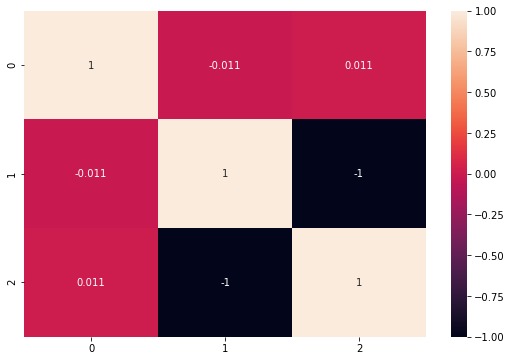

In [21]:
correlationMatrix =  np.corrcoef(x.T)

plt.subplots(figsize=(9, 6))
sns.heatmap(correlationMatrix,annot=True)

sns.heatmap(correlationMatrix, cbar=False)
plt.show()

the above correlation matrix represents that the continous variable of cont1's relation with the labels of the categorical variables of cat75 , as we cannot find the correlation directly between the two variables of cat and continous variables , I have calculate the correlation among the labels of the categorical variables.
https://stackoverflow.com/a/44694839

We see that there is high correlation between the cont1 and B label and very less correlation between the other label (A) . 


(Calculating the correlation between all of the other inter correlated features between the categorical and continous variables would be heavily computationally expensive . So i have compared and explained one pair of features )

In [269]:
sorted_lis=sorted(df_cat.corr(),reverse=True)
sorted_cor_vals=sorted(df_cat.corr()['loss'],reverse=True)
print("Highest correlations between target variable (loss) and categorical variables are :")
for i in range (1,20):
    print('Correlation b/w loss and {} is {}'.format(sorted_lis[i],sorted_cor_vals[i]))

Highest correlations between target variable (loss) and categorical variables are :
Correlation b/w loss and cat99 is 0.44117227537933246
Correlation b/w loss and cat98 is 0.35264610553443987
Correlation b/w loss and cat97 is 0.3463109783045611
Correlation b/w loss and cat96 is 0.31673566668100067
Correlation b/w loss and cat95 is 0.3110795321877748
Correlation b/w loss and cat94 is 0.2821621420527702
Correlation b/w loss and cat93 is 0.2802158295989732
Correlation b/w loss and cat92 is 0.2671065207194228
Correlation b/w loss and cat91 is 0.2296653129769516
Correlation b/w loss and cat90 is 0.22822718052528498
Correlation b/w loss and cat9 is 0.22534650529721184
Correlation b/w loss and cat89 is 0.22197014571159082
Correlation b/w loss and cat88 is 0.22187012692630909
Correlation b/w loss and cat87 is 0.19317951947041323
Correlation b/w loss and cat86 is 0.19107617368773316
Correlation b/w loss and cat85 is 0.18978919971150296
Correlation b/w loss and cat84 is 0.16026437327824933
Corre

we see that there is more correlation between the categorical features and the target variable (loss) in the overall as compared to the continous variables . Which indicates that the categorical features would play more important role in the target variable as comapred to the continous variables. 

And also see that the very highly inter correlated features like (cat3, cat90) , although have high correlation amongst each other but while analysing the correlation between each of them with loss respectively , we see that in almost all the pairs only a single one of the feature has high correlation with the loss . 
So , there is a chance that the correlation amongst the features wouldn't be very problematic.

# Analysis of target variable (loss)

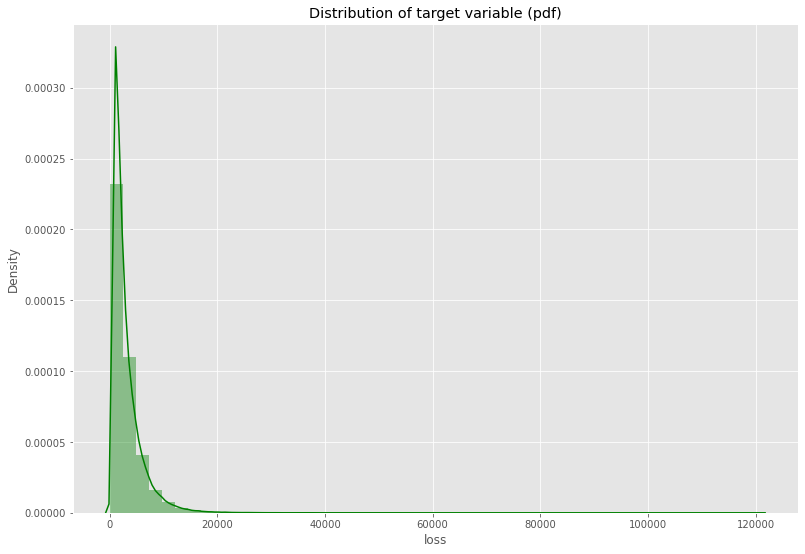

In [280]:
plt.figure(figsize=(13,9))
plt.title("Distribution of target variable (pdf)")
sns.distplot((train_data["loss"]),color='g')
plt.show()

The target variable has a very right skewed nature because of some outliers present, causing the distribution to be highly right skewed . As many of the models assume that the target variable has a normal (gaussian ) distribution . This target variable (raw) here would impact on our model negatively .

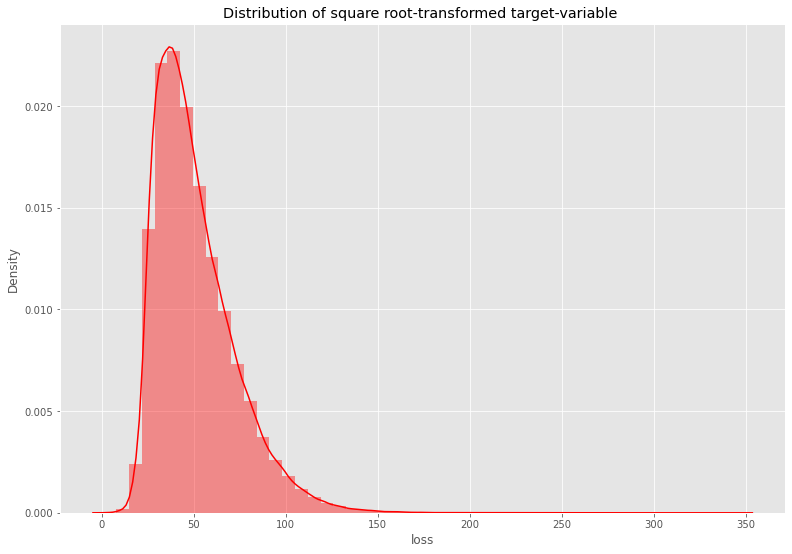

In [289]:
plt.figure(figsize=(13,9))
plt.title("Distribution of square root-transformed target-variable ")
sns.distplot(np.sqrt(train_data["loss"]),color='r')
plt.show()

Transforming the target-variable with square-root transformation helps reducing the skewness , but still we can see that the distribution is still right-skewed and not properly a gausian distribution.

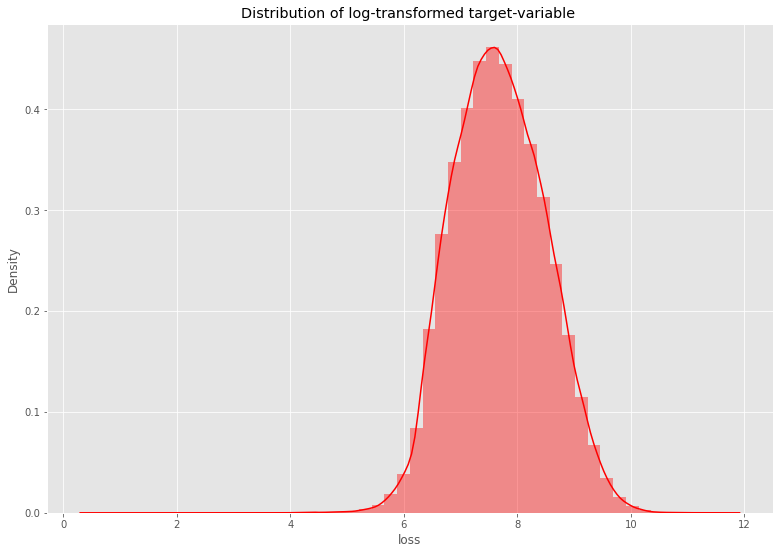

In [281]:
plt.figure(figsize=(13,9))
plt.title("Distribution of log-transformed target-variable ")
sns.distplot(np.log1p(train_data["loss"]),color='r')
plt.show()

By transforming the target-variable with log() makes the distribution almost gaussian , but the distribution has become little left skewed . Although modeling with this data is possible more correction can be implemented.

<AxesSubplot:xlabel='loss', ylabel='Density'>

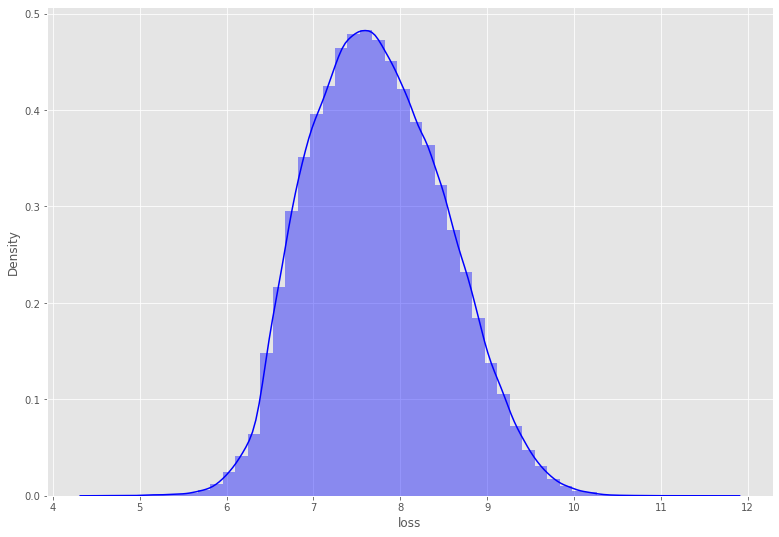

In [290]:
plt.figure(figsize=(13,9))
sns.distplot(np.log1p(train_data["loss"]+90),color='b')

With the help of log(x+90) transformation the distribution of the loss looks more like a gaussian distribution.

In [117]:
unique_vals=[]
for cols in column_names[1:117]:
#     print(train_data[cols].describe())
    unique_vals.append(train_data[cols].describe().unique()[1])


In [105]:
unique_vals=[]
for i in range(1,117):
    unique_vals.append(train_data.iloc[i].describe().unique()[1])

Target looks like regression
Showing only top 10 of 62 categorical features


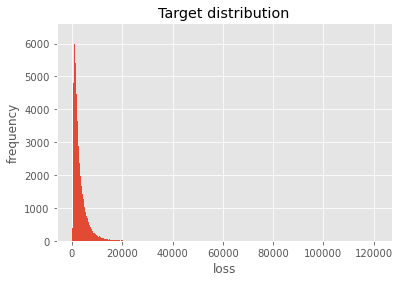

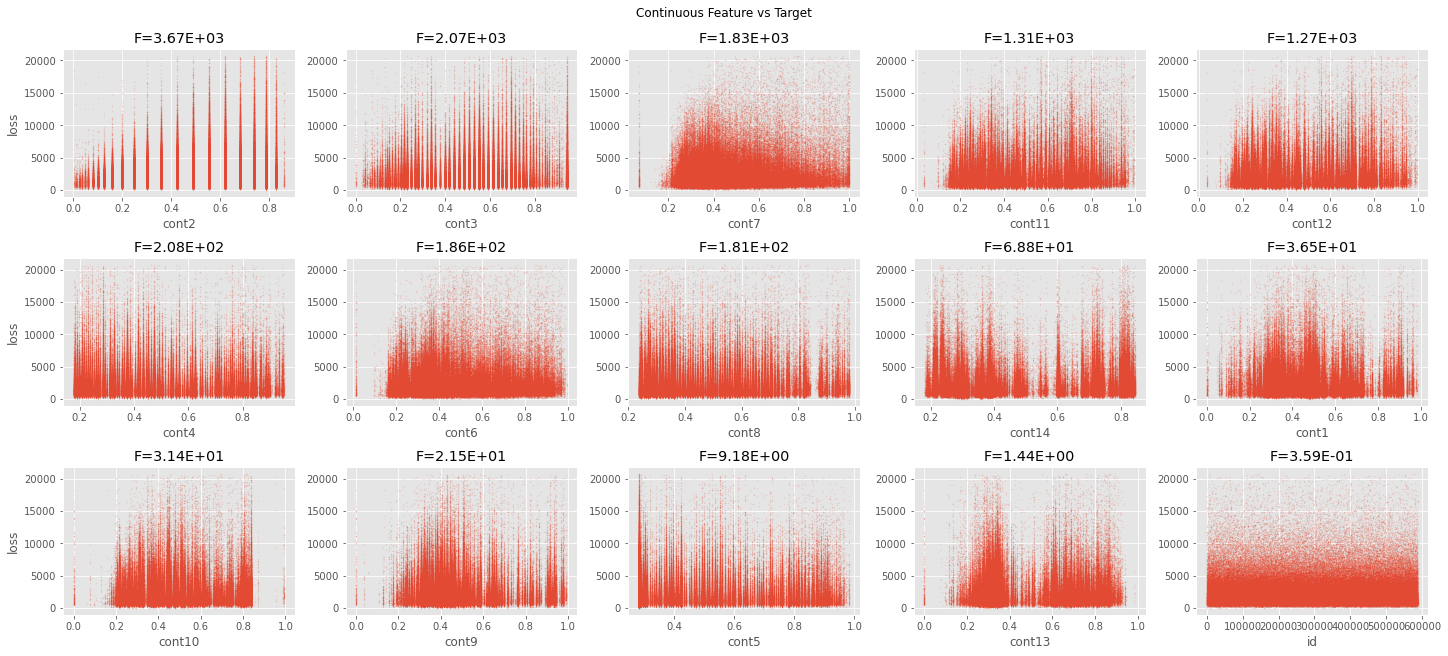

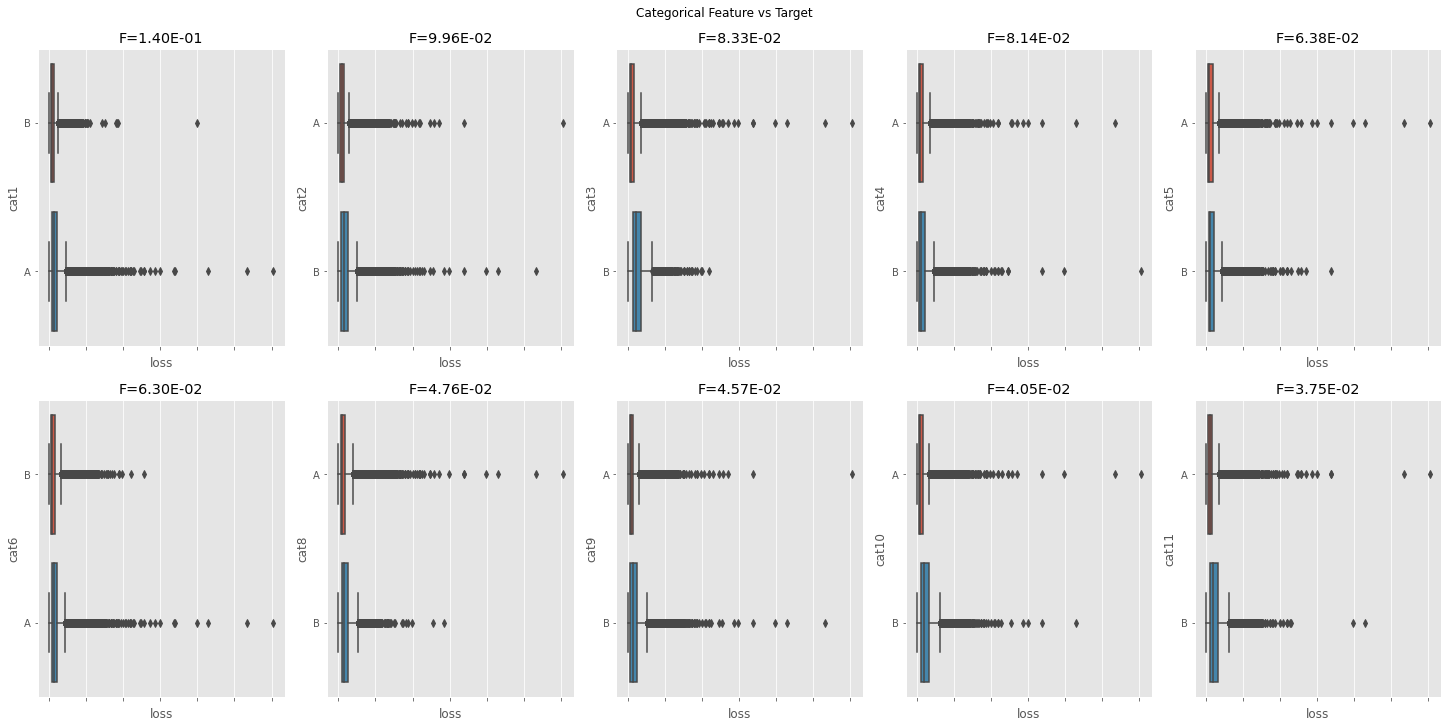

In [26]:
import dabl
import warnings
import matplotlib.pyplot as plt
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
dabl.plot(train_data, target_col = 'loss')


https://analyticsindiamag.com/lets-learn-dabl-a-python-tool-for-data-analysis-and-ml-automation/

In the above plot I have used the help of dabl plots , DABL plots helps us in analysing the data fastly (in basic sense ), they also help in handling in missing values and also pre-processes the data to certain extent.
some of the conclusions from the above plots are :
-> The dabl plot recognises that it is a regression problem . 


->And the initial distribution of the loss is plotted 


->The dabl plot ,plots all the most important features of continous features .


-> Only the top categorical features ( name wise ) have been plotted as dabl plot does'nt convert the categorical variables into continous variables in this version.


-> The claims are mostly less than 20,000 dollars 


-> In continous variable plots we can see that that in cont2 vs the loss , as the values of the cont2 increases the loss also increases


-> In categorical variable's plots we see as the majority label's value increases the loss values also .

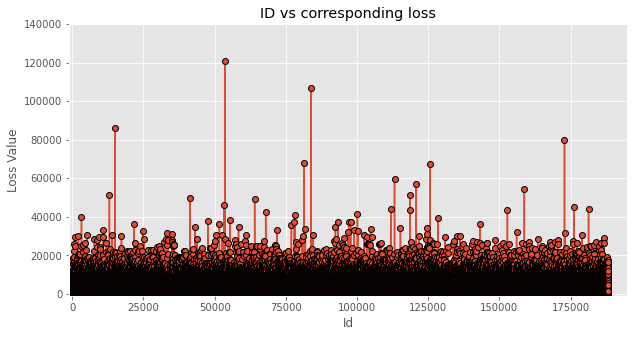

In [297]:
# View outliers for loss amount
plt.figure(figsize=(10,5))
plt.xlabel('Id')
plt.ylabel('Loss Value')
plt.title('ID vs corresponding loss')
plt.xlim([-1000, 195000])
plt.ylim([-1000, 140000])
plt.plot(train_data.index, train_data["loss"], marker='o', markeredgecolor='k')
plt.show()


As seen in the above plot there are some 3-6 outliers in our data of more 100,000 points ,the main one in which is a claim amount of more than 120,000 usd . But while training our model this might not pose a big problem because of very few outliers .

# Analysis of Train and Test datasets ( adverserial validation)

In the next few lines of code we analyse and check if the train and test data have same kind of distributions . If there are different distributions the model will not predict the values properly after training on a different distribution.


In [317]:
cat_vars=cat_vars[:-1]

In [303]:
from copy import deepcopy

In [314]:
from sklearn.decomposition import PCA


In [333]:
cat_features = list(train_data.select_dtypes(include=['object']).columns)

In [352]:
# Simple data preparation

train_adverse = train_data.drop(['id','loss'], axis=1)
test_d = test_data.drop(['id'], axis=1)

# To make sure we can distinguish between two classes
train_adverse['Class'] = 1
test_d['Class'] = 0

# concatenating train and test in one big dataset
data = pd.concat((train_adverse, test_d))

# We use label encoding for categorical features:
data_le = deepcopy(data)
for c in range(len(cat_features)):
    data_le[cat_features[c]] = data_le[cat_features[c]].astype('category').cat.codes

# We use one-hot encoding for categorical features:
data = pd.get_dummies(data=data, columns=cat_features)

In [353]:
data = data.iloc[np.random.permutation(len(data))]
data.reset_index(drop = True, inplace = True)
x = data.drop(['Class'], axis = 1)
y = data.Class

In [347]:
train_samples = 100000
x_train = x[:train_samples]
x_test = x[train_samples:]
y_train = y[:train_samples]
y_test = y[train_samples:]

In [348]:
data_le = data_le.iloc[np.random.permutation(len(data_le))]

In [349]:
X = data_le.iloc[:, :130]
y = data_le.iloc[:, 130:]

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

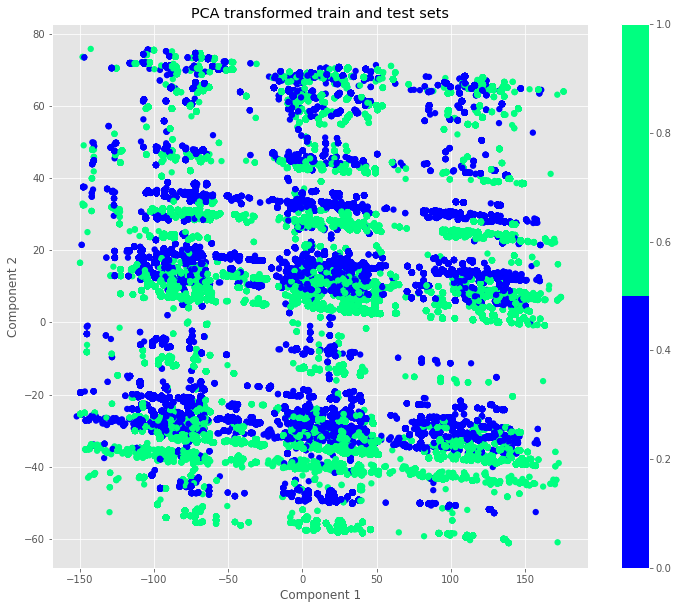

In [350]:
plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=np.array(y), 
            edgecolor='none', s=40,
            cmap=plt.cm.get_cmap('winter', 2))
plt.title('PCA transformed train and test sets')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()

Hence , we see that the distribution of both the train and test data is almost similar as they overlap on each other and hence while trainiig the models we will hav relatively no issues because of distributions of train and test datasets . 